# Udacity Data Analysis Project 1: TMDb movie data

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Question #1: actors with the most appearances in films</a></li>
        <li><a href="#q2">Question #2: Exploring the Movie genres through the years of the dataset</a></li>
        <li><a href="#q3">Question #3: Top Movies based on features</a></li>
        <li><a href="#q4">Question #4: Average Votes Distribution</a></li>
        <li><a href="#q5">Question #5: Correlations</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

_________________________________________________________________________________________________

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

In this presentation, based on this dataset various questions will be answered for the curious minds. For example who are the most famous actors? Movie genres, how did they change all over the years. What about the revenues, budget and movie popularity, do they correlate weach other. So Lets start exploring the dataset.

In [1]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling - Presenting the Data

### Reading the Data:

In [2]:
# Load your data

data = pd.read_csv('tmdb-movies.csv')

### Printing the Data's data type and dimensions

The TMdb dataset consists of 10866 rows and 21 columns.

In [3]:
print(data.shape)

(10866, 21)


### Printing data columns

Lets find out the name of the columns for this dataset.

In [4]:
print(list(data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


### Inspecting the 10 first rows from the Data

Here it is presented the first 10 rows from the TMdb dataset, Lets look at each column. There are id columns as a unique value corresponding to each row - entry, which on its side represents each movie. There are other columns which describes financial values such budget and revenue. Other columns include information like the genre of this movie, the production companies, the release_date, the crowd's votes.

In [5]:
data.head(7)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


---------------------------------------------------------------------------------------------

### Data Cleaning

In this part a trivial data cleaning will be performed. The columns that were selected for the preprocessing will be used for following cells below.

In [6]:
########################################
###removing nan values from cast column, keeping only movies, that has casted actors
###also removing rows where revenue_adj and budget_adj is equal to zero
####################################


data = data[data["cast"].isnull() == False]
data = data[data["genres"].isnull() == False]

data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

---------------------------------------------------------------------------------------------

### Descriptive Statistics

In this section basic descriptive statistics are being presented for each column from the dataset.

In [7]:
########################################
###basic descriptive statistics
####################################

data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3851.000000,3851.000000,3.851000e+03,3.851000e+03,3851.000000,3851.000000,3851.000000,3851.000000,3.851000e+03,3.851000e+03
mean,39879.405609,1.192507,3.723839e+07,1.077619e+08,109.224357,528.144118,6.168294,2001.262270,4.427949e+07,1.371632e+08
std,67232.582887,1.475367,4.220955e+07,1.765869e+08,19.923400,880.170237,0.794736,11.284113,4.480720e+07,2.161663e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.500000,0.463246,1.000000e+07,1.361474e+07,95.000000,71.000000,5.700000,1995.000000,1.315105e+07,1.840705e+07
50%,11319.000000,0.798104,2.400000e+07,4.486219e+07,106.000000,204.000000,6.200000,2004.000000,3.004017e+07,6.176752e+07
75%,38577.000000,1.371352,5.000000e+07,1.242887e+08,119.000000,580.500000,6.700000,2010.000000,6.069013e+07,1.633434e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


______________________________________________________________________________________________

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Question #1: actors with the most appearances in films
Just by looking at the dataset and especially the casted actors per movie, one question that rises is the number of appearances per actor. Paraphasing the question, we can say who are the actors that appeared the most in the movies from the dataset above. The following code snippet finds these actors.

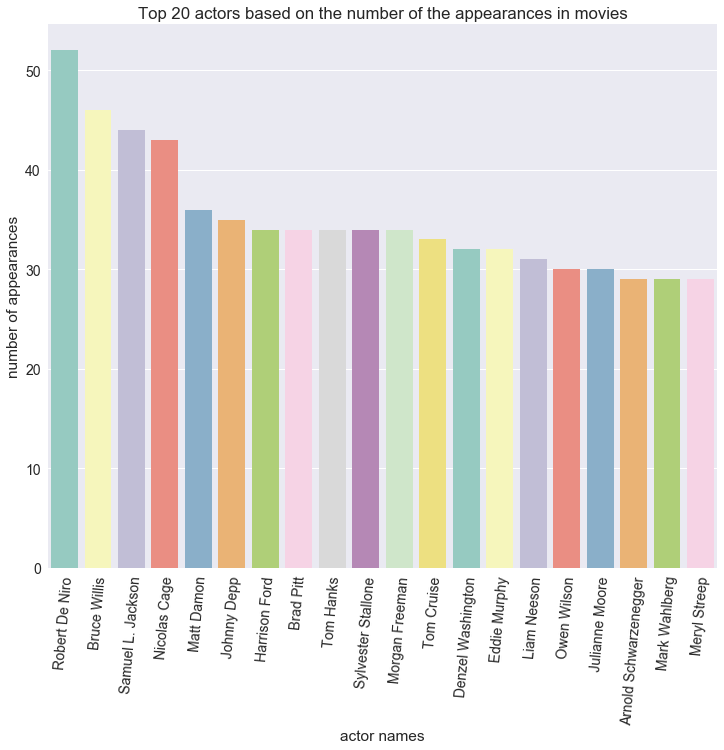

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

######
#Creating a dict for the cast, and how many times each actor casted for movies
######
actor_dict = {}

actors = data["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                


sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 20 actors based on the number of the appearances in movies')
plt.show()

It is clear from the figure above that the top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.

<a id='q2'></a>
### Question #2: Exploring the Movie genres through the years of the dataset

Lets explore the movies' genres, over the years of the TMDb dataset. This part contains multiple questions. At first lets ask a question which genre was the most popular from year to year over these years. Secondly another question is lets find out how many movies per genre were produced from year to year. Lastly it would be great to plot the number of the movie genres that were produced all over these years. The code snippets below investigates the dataset and produces the answers for the questions mentioned above. To code snippet below prepares a dataframe containing the number of movies from year to year.

In [9]:

year_set = set()
genre_set = set()
genres_and_year = data[["genres", "release_year"]]

#########################
#create a set of unique years of movies
#########################
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)
        
#print(year_set)


#############################################################
#create a set of unique genres by parsing all the years
#############################################################
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.add(genre)


#print("year:", year, "\n", sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True))      


##########################################################################
#create a dataframe which contains the sum of movies' genre per year
##########################################################################
gerne_count_per_year_df = pd.DataFrame(index = year_set, columns=genre_set)
gerne_count_per_year_df[:] = 0  

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]



########################################################
###most popular genre of movies from year to year
########################################################
#print(gerne_count_per_year_df.apply( max, axis=1 ))
#print(gerne_count_per_year_df.idxmax(axis = 1))
most_popular_genre_by_year = pd.DataFrame([gerne_count_per_year_df.idxmax(axis = 1).values,
                                          gerne_count_per_year_df.apply( max, axis=1 ).values],
                                          columns = gerne_count_per_year_df.index,
                                         index = ["genre", 'counts'])







#### Question #2.1: Most popular movie genre by year
After the execution of the code above, lets see which movie genre was the most popular from year to year and the number of movies that belong to this genre. The following table describes the idea described above. Each year in this table show the most popular movie genre and the number of movies in this category.

In [10]:
most_popular_genre_by_year

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,Drama,Drama,Drama,Thriller,Drama,Drama,Adventure,Drama,Drama,Adventure,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
counts,3,6,5,3,4,3,2,7,6,2,...,89,75,81,83,85,89,66,80,79,81


#### Question #2.2: How much the movie genres changes from year to year
The next 2 figures, show the flactuations of movie genres from year to year. Two different plots were used; bar and area plot to visualize the movie genres' changes/flactuations/trends from year to year.

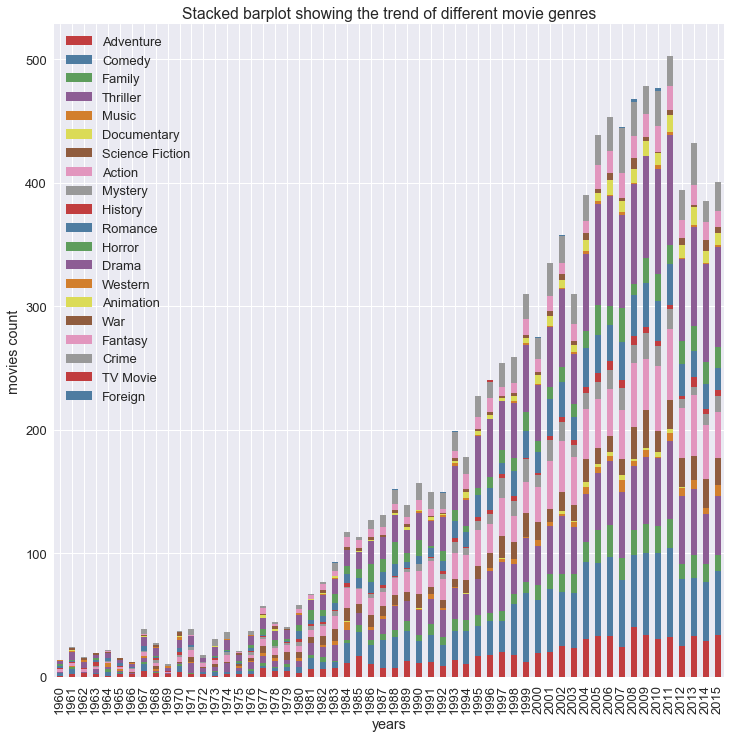

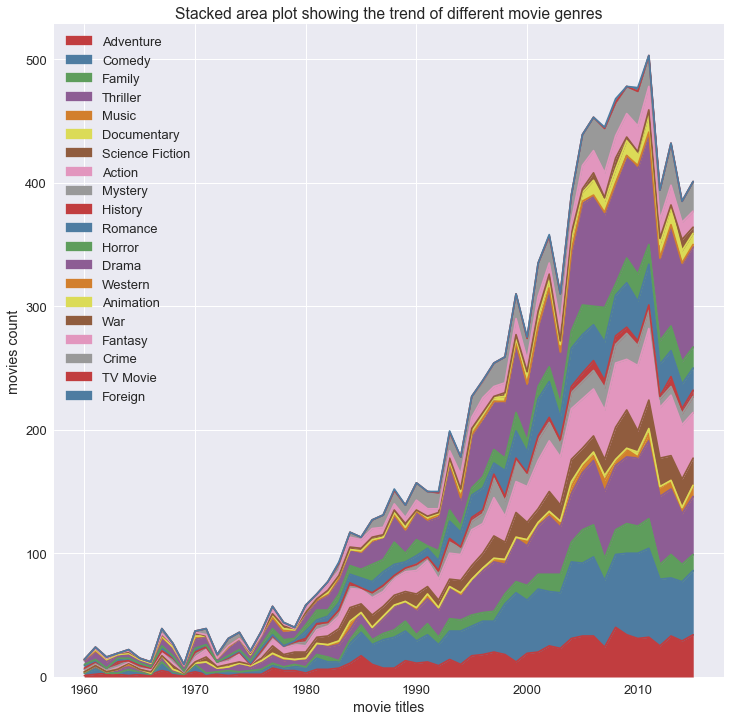

In [11]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)
sns.set_palette("Set1", 20, .65)


ax = gerne_count_per_year_df.plot.bar(stacked=True);
ax.set(xlabel='years', ylabel='movies count', title = 'Stacked barplot showing the trend of different movie genres')
plt.show()


ax = gerne_count_per_year_df.plot.area(stacked=True);
ax.set(xlabel='movie titles', ylabel='movies count', title = 'Stacked area plot showing the trend of different movie genres')
plt.show()

In general the number of movies and consequently the movie genres show an increase in numbers from 1960 to 2015. As we can see the majority of the movie genres show an increasing trend. Drama seems to be the most frequent and pervalent genre in movies through all these years. Othe categories such as Thriller, Comedy and Action movies show a similar pattern.

#### Question #2.3: How many movies based on their genres were produced
Examining even more the movie genres' some can wonder about the number of movies based on their genre. Thus the next code snippet and the next figure show the number of movies that produced in 1960 to 2015 according to their respective movie genres.

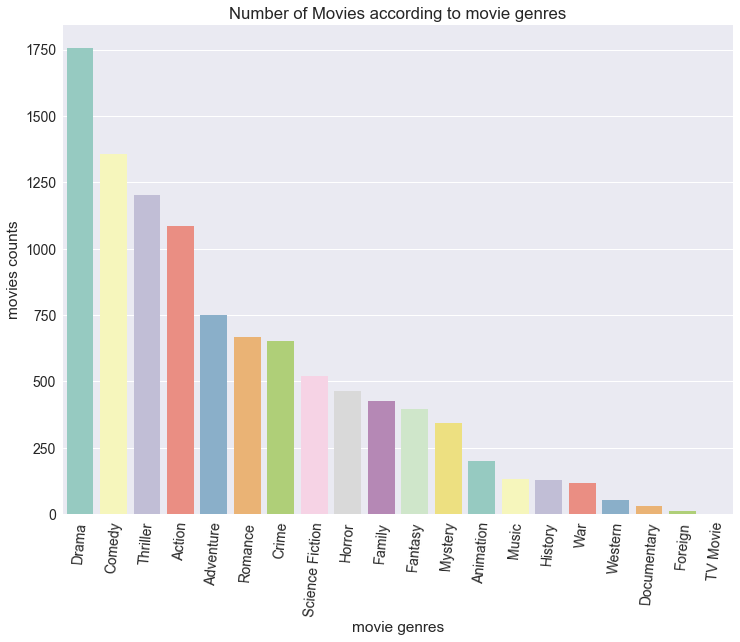

In [12]:
temp = gerne_count_per_year_df.apply(sum)
temp = temp.sort_values(ascending= False)

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
ax = sns.barplot(temp.index, temp, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='movie genres', ylabel='movies counts', title = 'Number of Movies according to movie genres')
plt.show()

As we can see, Drama movies are the most frequent movie genre that other genres. In general and according to this dataset The top 3 dominant movie genres all over these years (1960 - 2015) are Drama, Comedy and Thriller.

<a id='q3'></a>
### Question #3: Top Movies based on features
Moving to other features from the TMDb dataset. It would be beneficial to find out which movies had the highest budget, revenue popularity and average votes. So lets find out which are these top 10 movies based on these attributes.

#### Question #3.1: Top Movies based on their revenue
The following code snippet produce the barplot representing the top 10 movies based on their adjusted revenue.

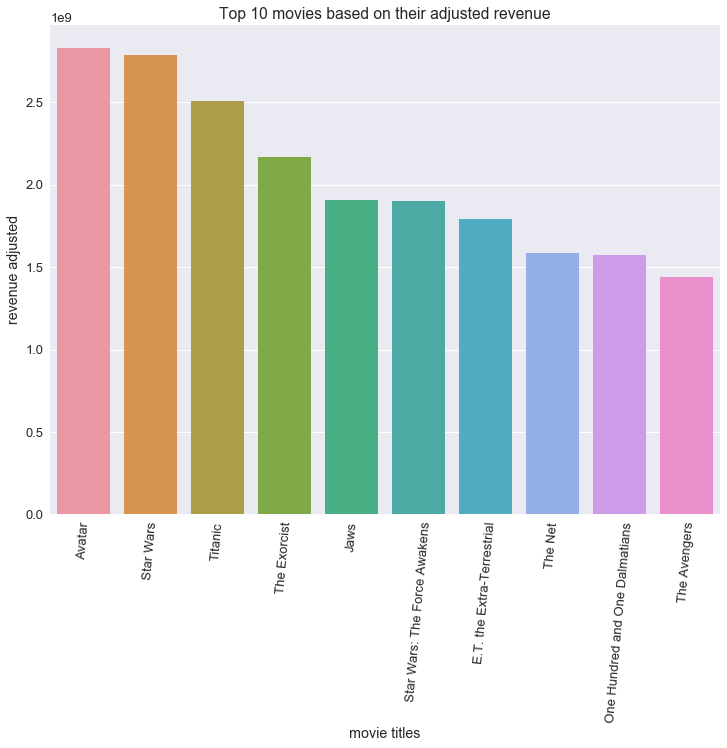

In [13]:
###
#Top Movies based on different features
###

revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = data[["original_title", "revenue_adj"]]
movies_and_budget = data[['original_title','budget_adj']]
movies_and_popularity = data[['original_title','popularity']]
movies_and_votes= data[['original_title','vote_average']]


#print(movies_and_revenue.sort_values(by="revenue_adj", ascending=False).head(10))
#print("\n")
#print(movies_and_budget.sort_values(by = "budget_adj", ascending = False).head(10))

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.

#### Question #3.2: Top Movies based on their budget
The following code snippet produce the barplot representing the top 10 movies based on their adjusted budget.

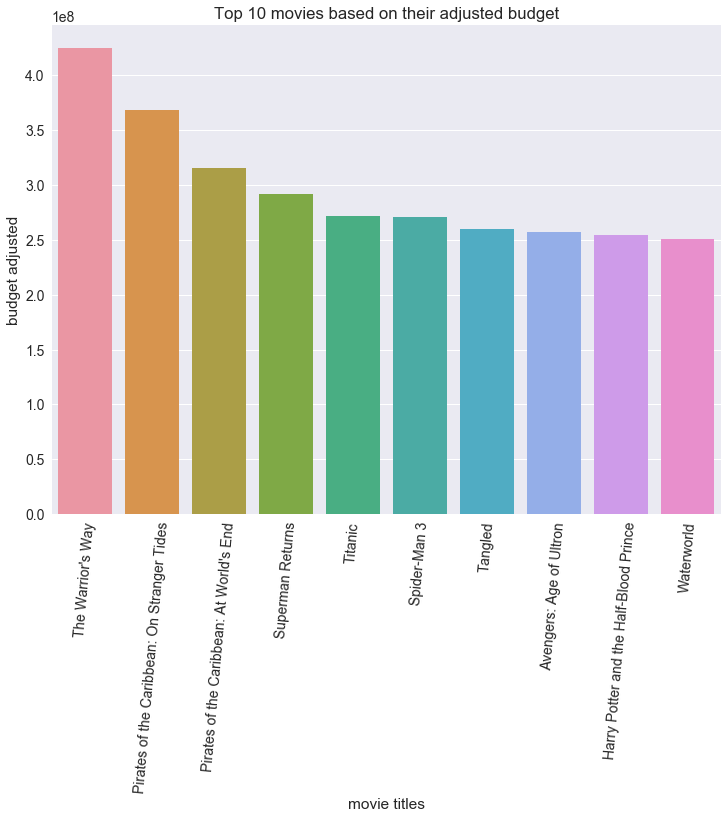

In [14]:
#####
#Top 10 movie with the highest adjusted revenue
#####

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(10).original_title, 
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(10).budget_adj)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='budget adjusted', title = 'Top 10 movies based on their adjusted budget')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted budget are the followings; The Warrior's Way, Pirates of the Caribbean: On Strange Tides, Pirates of the Caribbean: At World's Ends, Superman Returns, Titanic.

#### Question #3.3: Top Movies based on their popularity
The following code snippet produce the barplot representing the top 10 movies based on their popularity.

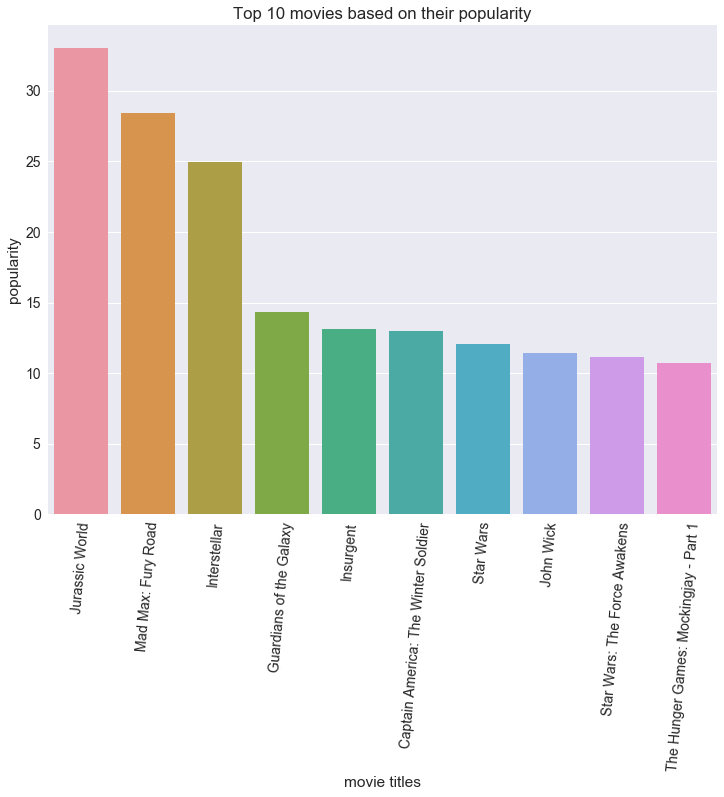

In [15]:
#####
#Top 10 movie with the highest popularity
#####

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted budget are the followings; Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent.

#### Question #3.4: Top 10 Movies based on their average vote
The following code snippet produce the barplot representing the top 10 movies based on their average vote.

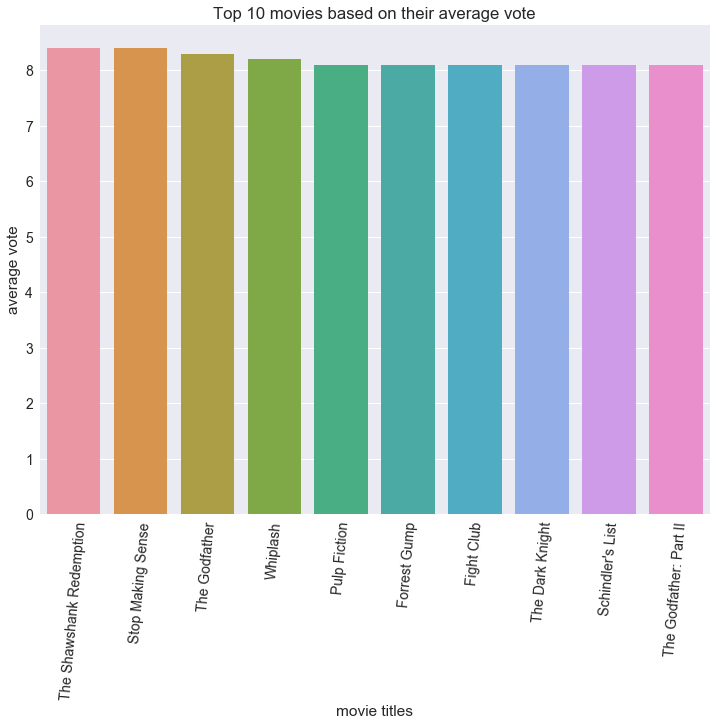

In [16]:
#####
#Top 10 movie with the highest popularity
#####

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).original_title, 
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).vote_average)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='average vote', title = 'Top 10 movies based on their average vote')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted budget are the followings; The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and Pulp Fiction.

>*Although the beautiful plots, from the figures above, someone can mention that It would have been expected that there will be a correlation between the top movies and especially the top 5 based on the previous attributes (adjusted_revenue, adjusted_budget, popularity and average votes). At least someone would assumed that the top 5 movies from feature to feature would be the same. On the contrary this idea does not appear in the previous figures.*

<a id='q4'></a>
### Question #4: Average Votes Distribution
Let's move to somewhere else. There is some curiosity about the movies' average votes. Lets see their distribution. The following code creates a boxplot which illustrates their mean which is about 6. Also two plots were created; one with the distribution of the ratings from 1960 to 2015 and another with the ratings distribution from by year.

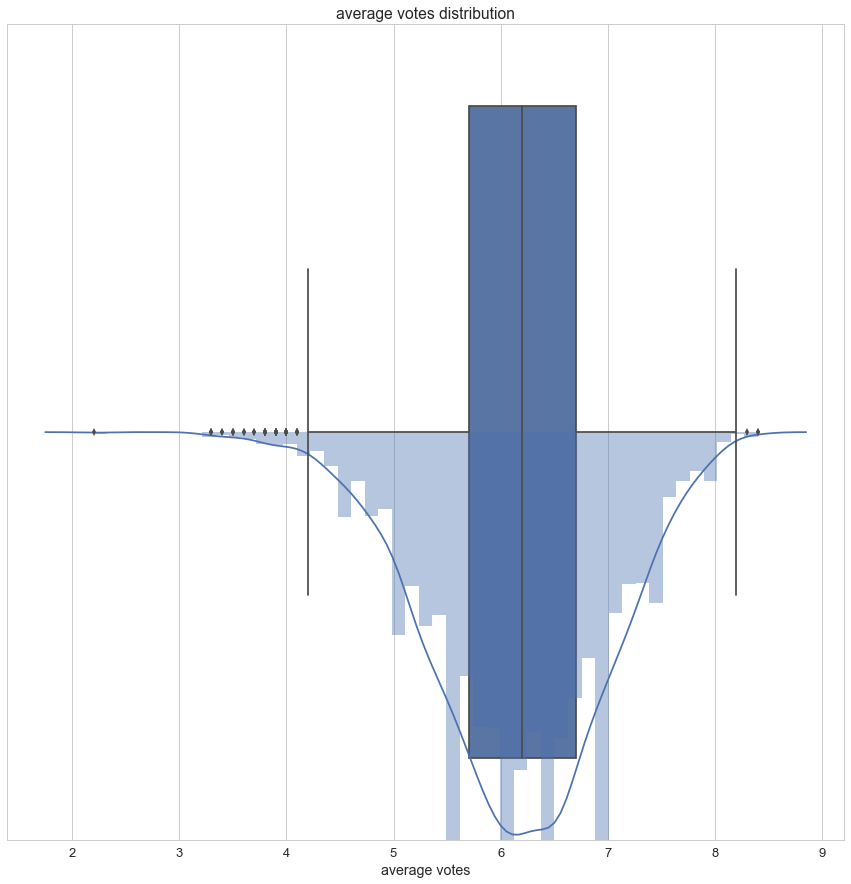

In [17]:
#####
#movie ratings' distribution all over the years
#####

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = data[["vote_average"]]


sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

#### Question 4.1: Ratings Distribution by Year
The previous question shows that the mean of the ratings all over these years (1960 - 2015) are almost 6. What about the ratings at a specific year. The following snippet code creates a plot showing the ratings distributions per year.

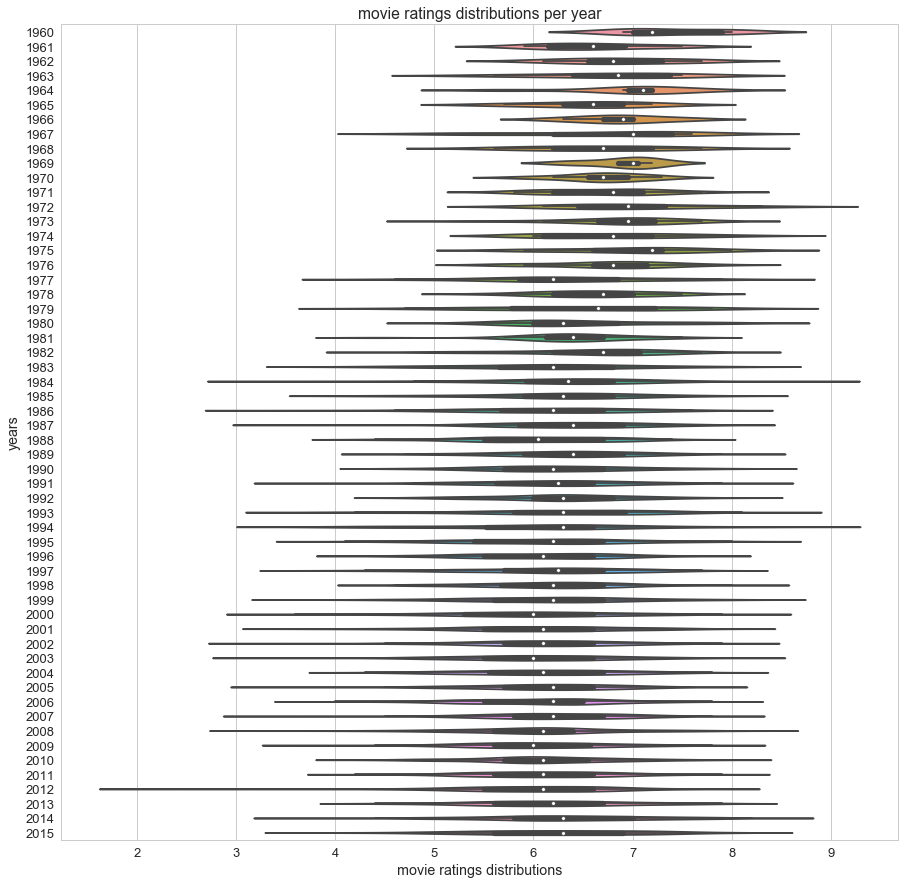

In [18]:
#####
#movie ratings' distributions per year
#####

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = data[["release_year", "vote_average"]]


sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.vote_average, y = temp_df.release_year, orient ="h")

ax.set(xlabel='movie ratings distributions', ylabel='years', title = 'movie ratings distributions per year')
plt.show()

The previous figure illustrates that all the years have mean ratings about 6 to 6.5. However some exclusions such as the year 1974 has mean ratings around 7. It seems that during that time great movies with high impact on the crowd were produced.

<a id='q5'></a>
### Question 5: Correlations
This section deals with the correlations. The creation of this part was inspired by the Question 3 part, where we were looking at the top 5 movies based on some characteristics (adjusted revenue, adjusted budget, popularity and average votes). We were expecting that regardless the features the top 5 movies would be the same. However this notion did not appear. So to investigate it even more scatterplots and correlations between the adjusted revenue, the adjusted budget, movies' popularity and vote average were produced. The code below produce scatterplots with pairs of these 4 variables.

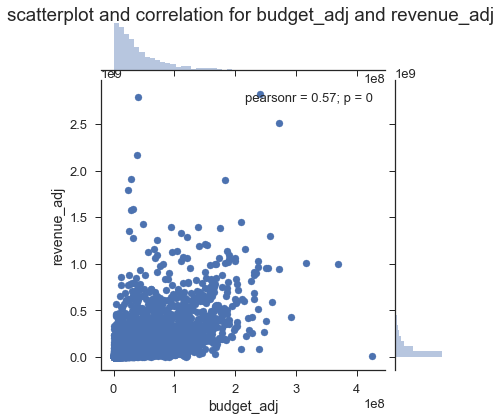

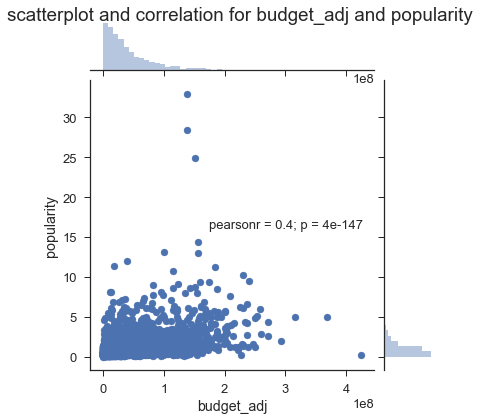

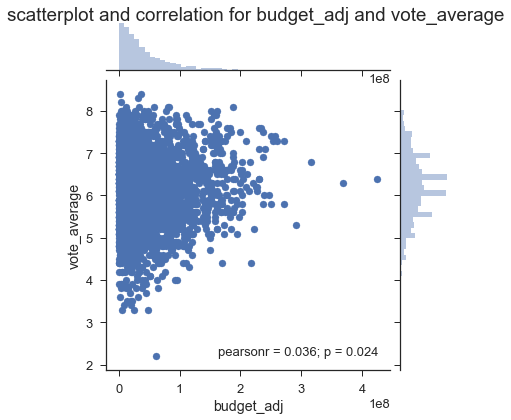

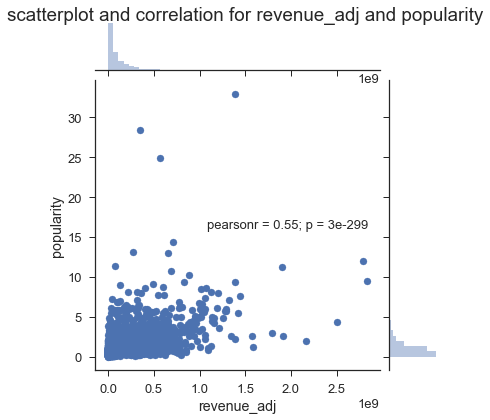

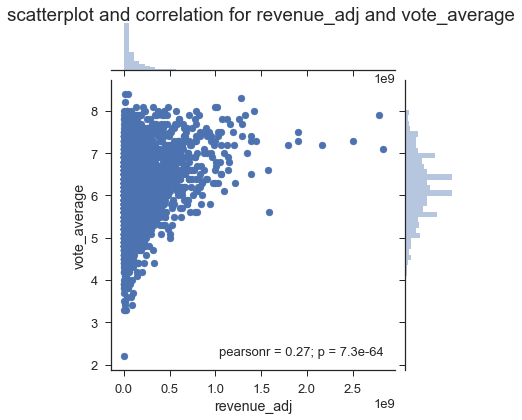

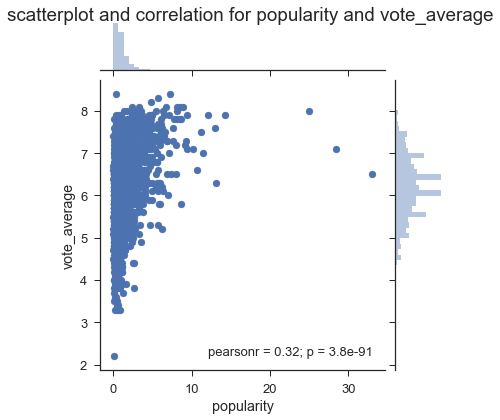

In [19]:
#####
#correlation plots
#####

#get
aux_df = data[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")


f1 = sns.jointplot(x = "budget_adj", y = "revenue_adj", kind = "scatter", data = aux_df)
f1.fig.suptitle('scatterplot and correlation for budget_adj and revenue_adj')

f2 = sns.jointplot(x = "budget_adj", y = "popularity", kind = "scatter", data = aux_df)
f2.fig.suptitle('scatterplot and correlation for budget_adj and popularity')
f3 = sns.jointplot(x = "budget_adj", y = "vote_average", kind = "scatter", data = aux_df)
f3.fig.suptitle('scatterplot and correlation for budget_adj and vote_average')

f4 = sns.jointplot(x = "revenue_adj", y = "popularity", kind = "scatter", data = aux_df)
f4.fig.suptitle('scatterplot and correlation for revenue_adj and popularity')
f5 = sns.jointplot(x = "revenue_adj", y = "vote_average", kind = "scatter", data = aux_df)
f5.fig.suptitle('scatterplot and correlation for revenue_adj and vote_average')

f6 = sns.jointplot(x = "popularity", y = "vote_average", kind = "scatter", data = aux_df)
f6.fig.suptitle('scatterplot and correlation for popularity and vote_average')

According to pearson coefficient there is a positive correlation between the adjasted revenue, adjasted budget and popularity. Moroever there is a weak positive correlation between the average votes with the other 3 variables (adjasted revenue, adjasted budget and popularity)

If we want to see all these relations in a single plot, seaborn's pairplot can provide this functionality

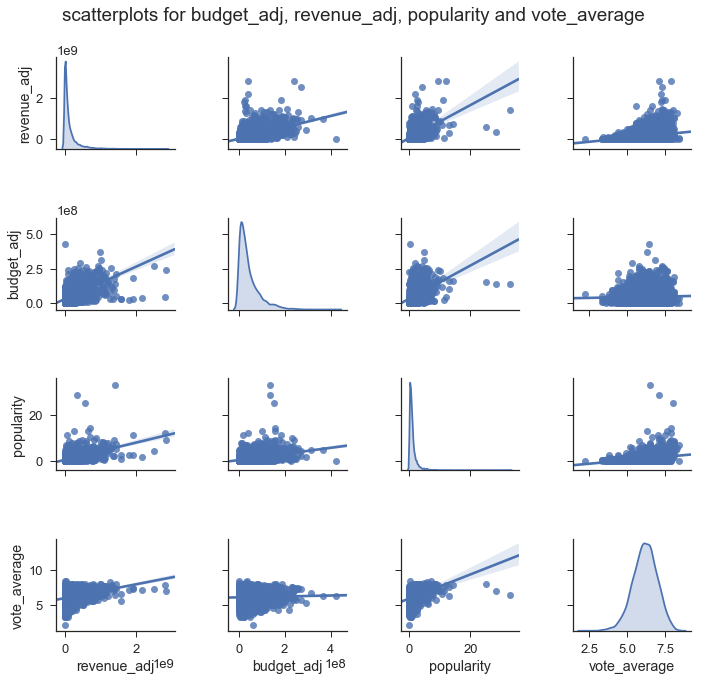

In [20]:
f1 = sns.pairplot(aux_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('scatterplots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<a id='conclusions'></a>
## Conclusions

This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.

In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0